# 1.1 Overview of Time Series Characteristics

---
*Definition*

A **univariate time series** is a sequence of measurements of the same variable collected over time.  Most often, the measurements are made at regular time intervals.

---

### Basic Objectives of the Analysis
1. Describe time series feature
2. Explain How past affects future
3. Explain How two time series are related
4. Predict future

### Types of models
1. current values is described by past values or erros (ARIMA)
2. Simple regression where time is used as Index 

Wnenever you encounter a time series look for folloiwng charecteristics
### Important charecteristics to consider
1. is there a **trend**?,
2. is there a **seasonality**?,
3. are there any **outliars**?,
4. is there any **long term cycle**?,
5. is there **constant variance** overtime,
6. is there any **abrupt change** in variance/levels,

#### Example 1

In [23]:
import pandas as pd
import matplotlib.pyplot as plt 
import matplotlib
import warnings
warnings.filterwarnings('ignore')
matplotlib.style.use("seaborn")
%matplotlib inline

In [14]:
quakes = pd.read_csv("./data/quakes.csv", delimiter='\t', header=None)
quakes.columns = ["year", "q"]

In [15]:
quakes.head()

,year,q
0,1900,13
1,1901,14
2,1902,8
3,1903,10
4,1904,16


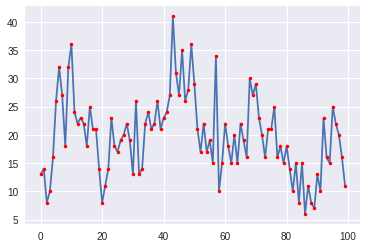

In [16]:
quakes.q.plot(marker='.',markerfacecolor='r', markeredgecolor='r')
plt.xlabel("quakes")
plt.ylabel("")
plt.show()

#### Features of the plot
1. No trend
2. No seasonality since it is an annual data
3. no obvious outliar 
4. difficult to say whether the variance remained constant thoughout

In [18]:
quakes["q-1"] = quakes.q.shift(1)
df1 = quakes.dropna()
df1.head()

,year,q,q-1
1,1901,14,13.0
2,1902,8,14.0
3,1903,10,8.0
4,1904,16,10.0
5,1905,26,16.0


In [19]:
import numpy as np
import statsmodels.api as sm

lets do regression on q and q-1

In [20]:
X = df1['q-1']
y = df1['q']
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      q   R-squared:                       0.295
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                     40.68
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           6.11e-09
Time:                        20:42:14   Log-Likelihood:                -316.49
No. Observations:                  99   AIC:                             637.0
Df Residuals:                      97   BIC:                             642.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.0369      1.806      5.004      0.0

getting the prediction of the model

In [24]:
df1["pred"] = model.predict(results.params, X)

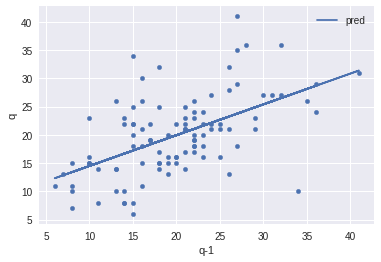

In [29]:
fig, ax = plt.subplots()
df1.plot.scatter("q-1", "q", ax=ax)
df1.plot("q-1", "pred", ax=ax)
plt.show()

the r square value is not that great 29% , so not going to give you great predictions

#### Residual Analysis
plot of residual versus fit is a very useful diagnostic tool.

In [31]:
df1['resi'] = df1.loc[:,'q'] - df1.loc[:,'pred']

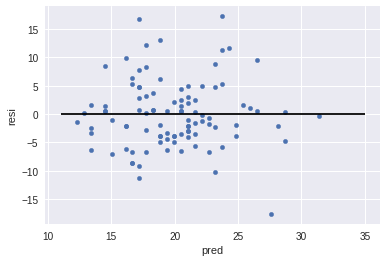

In [33]:
df1.plot.scatter("pred", "resi")
plt.hlines(0, 11,35)

does not show any serious problem, there might be an outliar at 28

#### Example 2 
quaterly beer production in australia

In [34]:
df2 = pd.read_csv("./data/quarterly-beer-production-in-aus.csv", header=None).iloc[:72,:]
df2.columns = ["Quarter", "beer"]
df2.head()

,Quarter,beer
0,1956Q1,284.4
1,1956Q2,212.8
2,1956Q3,226.9
3,1956Q4,308.4
4,1957Q1,262.0


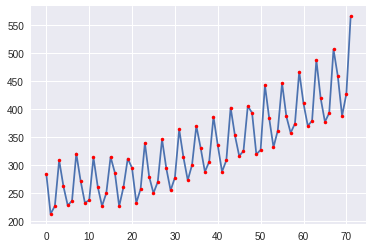

In [35]:
df2.beer.plot(marker='.', markerfacecolor='r', markeredgecolor='r')
plt.show()

#### Charecteristics of the data
1. There is an upward trend
2. there is no obvious outliar
3. there is a sesonality
4. variance might be increasing with time

#### Classical regression methods for trend and seasonal effects
1. use time index as predictor variable
2. quadratic trend so we can use $t$ and $t^2$
3. there is a seasonal effect so we might use flags for quarters
For linear trend:

$x_{t} = \beta_{1}t + \alpha_{1}S_{1}+\alpha_{2}S_{2}+\alpha_{3}S_{3}+\alpha_{4}S_{4}+\epsilon_{t}$

For quadratic trend

$x_{t} = \beta_{1}t +\beta_{2}t^2+\alpha_{1}S_{1}+\alpha_{2}S_{2}+\alpha_{3}S_{3}+\alpha_{4}S_{4}+\epsilon_{t}$

We have deleted the intercept because we have taken all the 4 quarters

In [36]:
df2['qtr'] = df2['Quarter'].apply(lambda x: x[-2:])
df2['time'] = df2.index+1
df2['time_sq'] = df2.time ** 2
df2 = pd.get_dummies(df2, columns=["qtr"])

In [37]:
df2.head()

,Quarter,beer,time,time_sq,qtr_Q1,qtr_Q2,qtr_Q3,qtr_Q4
0,1956Q1,284.4,1,1,1,0,0,0
1,1956Q2,212.8,2,4,0,1,0,0
2,1956Q3,226.9,3,9,0,0,1,0
3,1956Q4,308.4,4,16,0,0,0,1
4,1957Q1,262.0,5,25,1,0,0,0


In [39]:
X = df2.iloc[:,2:]
y = df2.beer
model = sm.OLS(y,X)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   beer   R-squared:                       0.980
Model:                            OLS   Adj. R-squared:                  0.978
Method:                 Least Squares   F-statistic:                     635.2
Date:                Fri, 07 Dec 2018   Prob (F-statistic):           2.26e-54
Time:                        22:09:01   Log-Likelihood:                -272.42
No. Observations:                  72   AIC:                             556.8
Df Residuals:                      66   BIC:                             570.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
time           0.4070      0.255      1.593      0.1

In [40]:
df2["pred"] = model.predict(results.params, X)
df2["res"] = df2["beer"].sub(df2["pred"])

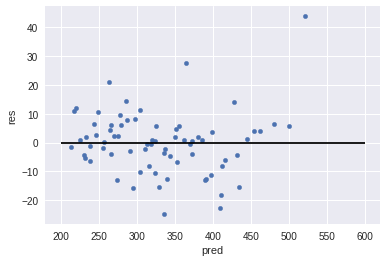

In [43]:
df2.plot.scatter("pred", "res")
plt.hlines(0,200,600)
plt.show()

There is normally everything looks ok , just the at the end there are some string of positive errors and there is a outliar in the end

For residual the notmal result is that they should be unrelated to each other. That mean they cant be predicted by previous values.

#### Sample Autocorrelation Function (ACF)
ACF gives correlation between $x_{t}$ and series of lags $1, 2, 3$ and so on

it can be use to find the ACF of the residulas as well. 

Lets see the acf grapf of the residuals of the example 1 and 2

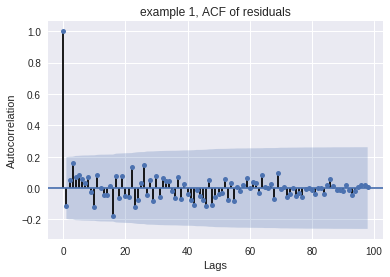

In [48]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df1.resi)
plt.title("example 1, ACF of residuals")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

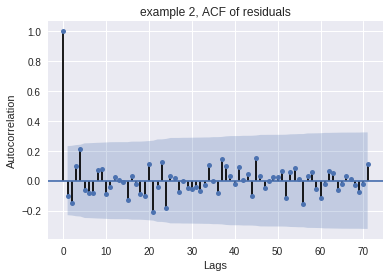

In [50]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(df2.res)
plt.title("example 2, ACF of residuals")
plt.xlabel("Lags")
plt.ylabel("Autocorrelation")
plt.show()

there is no significant aotocorrelation present in the residuals of the both datasets